In [1]:
import pandas as pd

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [16]:
targetData = pd.read_csv("../../../stdcode6/dataset/feature_regression_example.csv")

In [35]:
targetData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [6]:
ynMap = {"Y":1, "N":0}

In [7]:
targetData["HO_YN"] = targetData.HOLIDAY.map(ynMap)

In [8]:
targetData["PRO_YN"] = targetData.PROMOTION.map(ynMap)

In [ ]:
# 변환대상이 100개가 된다면 ( labelencode)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
ynLabelEn = LabelEncoder()

In [ ]:
# ynLabelEn.fit_transform(featuresData["HOLIDAY"])
# 형식으로 알아서 다 바꿔준다.

In [11]:
targetData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [17]:
targetData["HO_YN"] = ynLabelEn.fit_transform(targetData["HOLIDAY"])

In [18]:
targetData["PRO_YN"] = ynLabelEn.fit_transform(targetData["PROMOTION"])

In [19]:
targetData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [20]:
ynLabelEn.inverse_transform(targetData["HO_YN"])

array(['Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y'], dtype=object)

In [ ]:
# fit_transform과 inverse_transform

# 한 번 변형하였던 데이터를 추후 inverse_transform으로 원형 복귀할 수 있다.

In [21]:
def valueMeasure(inValue):
    # inValue = "Y"
    outValue = 1
    if inValue == "Y":
        outValue = 1
    else:
        outValue = 0
    return outValue

In [ ]:
# 함수를 활용하여 처리할 수도 있습니다.

In [ ]:
# machineLearning은 dictionary Mapping과 labelEncoder를 주로 사용합니다.

In [24]:
corrData = targetData.corr()

In [25]:
corrData

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [26]:
targetStd = 0.5

In [27]:
features = list(corrData[(abs(corrData.QTY > targetStd) & \
                          abs(corrData.QTY != 1))].index)

In [28]:
features

['PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [39]:
import matplotlib.pylab as plt
import seaborn as sns # lineplit
%matplotlib inline

C:\Users\SMART16\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTY', ylabel='Density'>

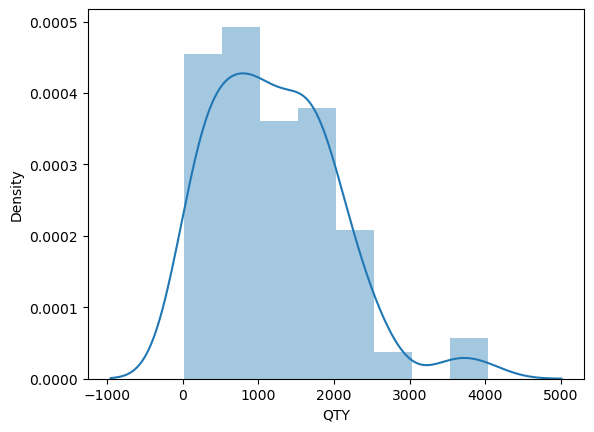

In [46]:
sns.distplot(targetData["QTY"])
# 변수 하나에 대한 밀집도를 파악할 수 있다.

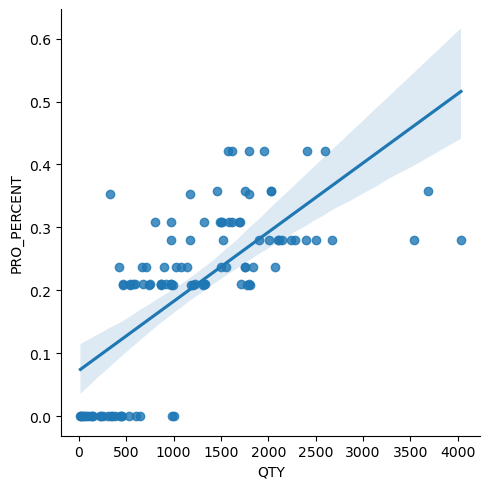

In [45]:
sns.lmplot(data=targetData, x="QTY", y="PRO_PERCENT")

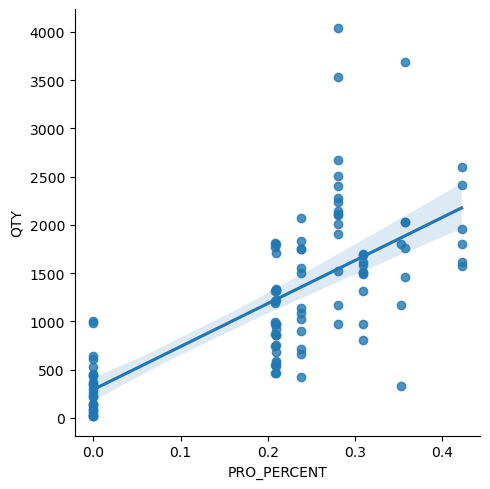

In [47]:
sns.lmplot(data=targetData, x="PRO_PERCENT", y="QTY")

In [ ]:
# 우상향 그래프 : QTY와 PRO_PERCENT가 양의 상관 관계를 지니고 있음을 의미한다.
# 기울기 > 0

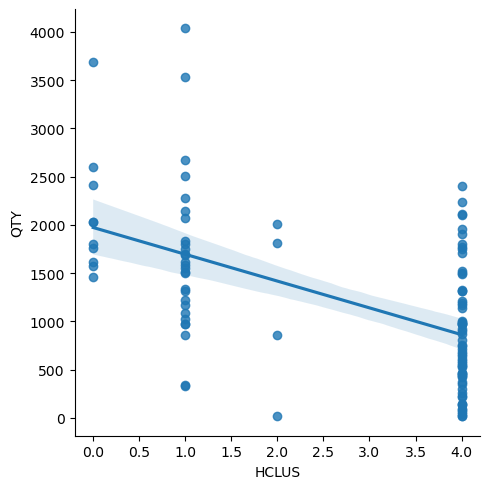

In [48]:
sns.lmplot(data=targetData, x="HCLUS", y="QTY")

In [49]:
targetData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


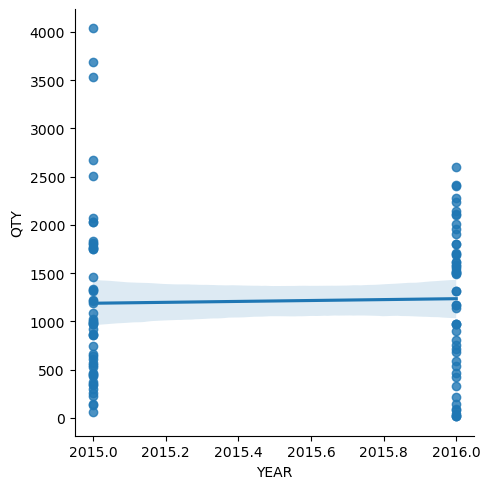

In [51]:
sns.lmplot(data=targetData, x="YEAR", y="QTY")

In [ ]:
# 0.7 ~ 1 : 뚜렷한 상관관계를 지닌다.
# 0.3 ~ 0.7 : 상관관계를 지닌다.
# 0.3 이하 : 유의미한 상관관계를 지니지 않는다.

In [63]:
import numpy as np

In [64]:
stdCorrRepeat = np.array(list(range(3, 8, 1))) / 10

In [65]:
stdCorrRepeat

array([0.3, 0.4, 0.5, 0.6, 0.7])

In [ ]:
# 요거 사용해서 for문 돌릴 수 있겠죠?

In [69]:
len(stdCorrRepeat)

5

In [78]:
for i in range(0, len(stdCorrRepeat)):
    targetStd = stdCorrRepeat[i]
    featuresDataList = list(corrData[(abs(corrData.QTY) >= targetStd) & (abs(corrData.QTY) != 1)].index)

In [55]:
featuresData = list(corrData[(abs(corrData.QTY) >= 0.3) & (abs(corrData.QTY) != 1)].index)

In [56]:
featuresData

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [90]:
qtyCorr = corrData.loc[:, ["QTY"]].sort_values(by=["QTY"], ascending=False)

<AxesSubplot:>

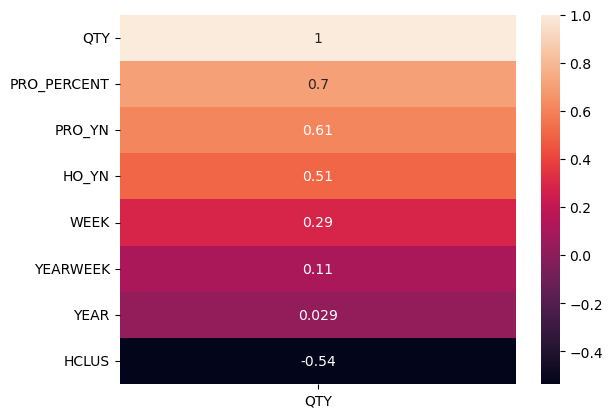

In [91]:
sns.heatmap(qtyCorr, annot=True)

In [ ]:
# 머신 러닝은 training / test 두 가지로 데이터를 분류
# 딥 러닝은 이를 세 가지로 구분한다.

In [92]:
stdRatio = 0.7
stdIndex = int(featuresData.shape[0] * stdRatio)

AttributeError: 'list' object has no attribute 'shape'

In [94]:
from sklearn.model_selection import train_test_split

In [96]:
trData, tdData = train_test_split(featuresData, test_size = 0.8)

ValueError: With n_samples=4, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(trData.shape)
print(tdData.shape)
# 요렇게 하면 무작위로 8:2로 데이터를 나눠준다

In [ ]:
trData, tdData = train_test_split(featuresData, test_size = 0.2, random_state = 10)
# random_state는 데이터를 고정. 첫 번째 10 개의 데이터를 고정시키고, 나머지를 무작위로
# 몇 번을 돌려도 10개는 동일하게 출력된다.